In [13]:
# Add this cell to download the vader_lexicon
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saikr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
#data = pd.read_csv("rev.csv")
#print(data.head())
try:
    data = pd.read_csv("rev.csv", encoding='latin1')
except UnicodeDecodeError:
    print("Encoding 'latin1' failed, trying 'iso-8859-1'")
    data = pd.read_csv("rev.csv", encoding='iso-8859-1')

print(data.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [15]:
print(data.describe())

                Id  HelpfulnessNumerator  HelpfulnessDenominator        Score  \
count  1035.000000           1035.000000             1035.000000  1035.000000   
mean    518.000000              1.217391                1.655072     4.187440   
std     298.923067              2.661802                3.126888     1.319998   
min       1.000000              0.000000                0.000000     1.000000   
25%     259.500000              0.000000                0.000000     4.000000   
50%     518.000000              0.000000                1.000000     5.000000   
75%     776.500000              1.000000                2.000000     5.000000   
max    1035.000000             43.000000               47.000000     5.000000   

               Time  
count  1.035000e+03  
mean   1.288882e+09  
std    5.039892e+07  
min    1.107821e+09  
25%    1.255651e+09  
50%    1.302134e+09  
75%    1.330733e+09  
max    1.351210e+09  


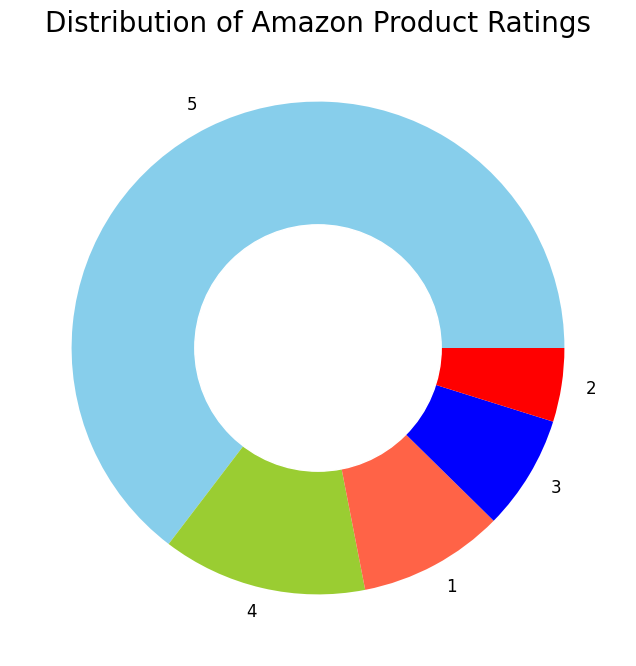

In [16]:
ratings = data["Score"].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors=custom_colors)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Amazon Product Ratings", fontsize=20)
plt.show()

In [17]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Text"]]
print(data.head())
data.to_csv('sentiment_data.csv', index=False)

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   


In [18]:
df = pd.DataFrame(data)

# Initialize SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df["Positive"] = df["Text"].apply(lambda x: sentiments.polarity_scores(x)["pos"])
df["Negative"] = df["Text"].apply(lambda x: sentiments.polarity_scores(x)["neg"])
df["Neutral"] = df["Text"].apply(lambda x: sentiments.polarity_scores(x)["neu"])

# Save only the sentiment scores to a new CSV file
data['Time'] = pd.to_datetime(data['Time'], unit='s')
df[['Positive', 'Negative', 'Neutral']].to_csv('scores_only.csv', index=False)

print("CSV file with only sentiment scores has been created.")

CSV file with only sentiment scores has been created.
0      2011-04-27
1      2012-09-07
2      2008-08-18
3      2011-06-13
4      2012-10-21
          ...    
1030   2009-12-01
1031   2009-06-09
1032   2012-01-09
1033   2012-01-07
1034   2011-11-11
Name: Time, Length: 1035, dtype: datetime64[ns]


In [19]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [20]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  198.374
Negative:  44.407
Neutral:  792.214
